In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.datasets import fetch_20newsgroups
import gensim
from gensim import corpora
from gensim.models import LdaModel, Word2Vec
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = newsgroups.data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# Text Preprocessing
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    tokens = [token for token in tokens if token.isalpha()]  # Remove punctuation
    tokens = [token for token in tokens if token not in stopwords.words('english')]  # Remove stopwords
    return tokens


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# Apply preprocessing to the documents
preprocessed_documents = [preprocess_text(doc) for doc in documents]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# Create a dictionary and a corpus for LDA
dictionary = corpora.Dictionary(preprocessed_documents)
corpus = [dictionary.doc2bow(doc) for doc in preprocessed_documents]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# Train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
# Print the topics found by the LDA model
print("LDA Topics:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}")

LDA Topics:
Topic: 0 
Words: 0.011*"space" + 0.004*"center" + 0.004*"new" + 0.004*"earth" + 0.004*"nasa" + 0.004*"also" + 0.004*"launch" + 0.004*"april" + 0.003*"may" + 0.003*"university"
Topic: 1 
Words: 0.016*"team" + 0.012*"game" + 0.011*"games" + 0.009*"play" + 0.009*"year" + 0.008*"season" + 0.007*"league" + 0.007*"gm" + 0.007*"nhl" + 0.006*"win"
Topic: 2 
Words: 0.008*"get" + 0.007*"would" + 0.007*"one" + 0.007*"use" + 0.006*"like" + 0.006*"know" + 0.005*"anyone" + 0.005*"thanks" + 0.005*"also" + 0.005*"windows"
Topic: 3 
Words: 0.038*"p" + 0.038*"x" + 0.034*"r" + 0.034*"q" + 0.033*"g" + 0.031*"max" + 0.030*"n" + 0.026*"c" + 0.025*"w" + 0.025*"b"
Topic: 4 
Words: 0.018*"card" + 0.007*"system" + 0.007*"bus" + 0.007*"dos" + 0.006*"scsi" + 0.006*"cards" + 0.006*"controller" + 0.006*"drivers" + 0.005*"windows" + 0.005*"ide"
Topic: 5 
Words: 0.009*"would" + 0.007*"one" + 0.006*"people" + 0.005*"use" + 0.004*"may" + 0.004*"government" + 0.003*"could" + 0.003*"also" + 0.003*"like" + 0.0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
# Prepare the visualization for LDA
lda_display = gensimvis.prepare(lda_model, corpus, dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
# Save visualization to HTML file
pyLDAvis.save_html(lda_display, '/content/drive/MyDrive/Colab Notebooks/lda_visualization.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
# Display HTML file in Colab
from IPython.display import HTML
display(HTML('/content/drive/MyDrive/Colab Notebooks/lda_visualization.html'))



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
# Train Word2Vec model on the preprocessed documents
word2vec_model = Word2Vec(sentences=preprocessed_documents, vector_size=100, window=5, min_count=5, workers=4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
# Represent each document as the average of word vectors
def document_vector(doc):
    # Remove out-of-vocabulary words
    doc = [word for word in doc if word in word2vec_model.wv.index_to_key]
    if len(doc) == 0:  # Handle case where all words are OOV
        return np.zeros(word2vec_model.vector_size)
    return np.mean(word2vec_model.wv[doc], axis=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
# Get vectors for each document
doc_vectors = [document_vector(doc) for doc in preprocessed_documents]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
# Create document vectors from LDA topic distributions
lda_doc_vectors = [lda_model.get_document_topics(bow, minimum_probability=0.0) for bow in corpus]
lda_doc_vectors = [[topic_prob for _, topic_prob in doc] for doc in lda_doc_vectors]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
# Calculate cosine similarity between document vectors
word_embedding_similarities = cosine_similarity(doc_vectors)
lda_similarities = cosine_similarity(lda_doc_vectors)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
# Cluster documents using KMeans
num_clusters = len(set(newsgroups.target))  # Number of unique categories
kmeans = KMeans(n_clusters=num_clusters, random_state=42)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
# Cluster based on word embeddings
kmeans.fit(doc_vectors)
word_embedding_labels = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [34]:
# Cluster based on LDA topic distributions
kmeans.fit(lda_doc_vectors)
lda_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [35]:
# Visualize clusters using PCA (Word Embeddings)
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(doc_vectors)
plt.figure(figsize=(14, 6))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'PCA Component 2')

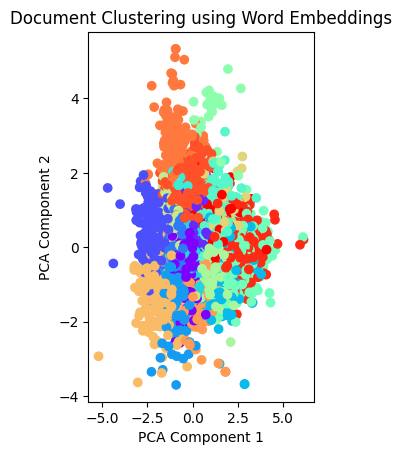

In [36]:
plt.subplot(1, 2, 1)
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=word_embedding_labels, cmap='rainbow')
plt.title('Document Clustering using Word Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'PCA Component 2')

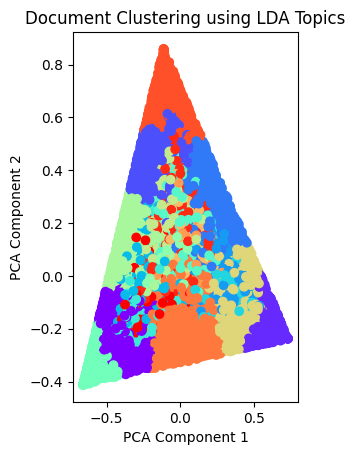

In [37]:
# Visualize clusters using PCA (LDA Topic Distributions)
reduced_lda_vectors = pca.fit_transform(lda_doc_vectors)
plt.subplot(1, 2, 2)
plt.scatter(reduced_lda_vectors[:, 0], reduced_lda_vectors[:, 1], c=lda_labels, cmap='rainbow')
plt.title('Document Clustering using LDA Topics')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

In [38]:
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
# Output cosine similarities
print("Cosine Similarity using Word Embeddings:")
print(word_embedding_similarities)


Cosine Similarity using Word Embeddings:
[[1.         0.42278487 0.70372374 ... 0.64481598 0.72458702 0.78151456]
 [0.42278487 1.         0.20414361 ... 0.82684049 0.40582127 0.72579023]
 [0.70372374 0.20414361 1.         ... 0.38278591 0.60303793 0.67916775]
 ...
 [0.64481598 0.82684049 0.38278591 ... 1.         0.60792691 0.83625411]
 [0.72458702 0.40582127 0.60303793 ... 0.60792691 1.         0.8480879 ]
 [0.78151456 0.72579023 0.67916775 ... 0.83625411 0.8480879  1.        ]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
print("\nCosine Similarity using LDA-based Vectors:")
print(lda_similarities)


Cosine Similarity using LDA-based Vectors:
[[1.0000001  0.13580967 0.15678197 ... 0.00458046 0.69072527 0.32177034]
 [0.13580967 1.         0.02896719 ... 0.07184692 0.10873766 0.10278655]
 [0.15678197 0.02896719 0.9999998  ... 0.00450664 0.28359565 0.16099265]
 ...
 [0.00458046 0.07184692 0.00450664 ... 1.0000001  0.01057391 0.86215436]
 [0.69072527 0.10873766 0.28359565 ... 0.01057391 1.         0.47187153]
 [0.32177034 0.10278655 0.16099265 ... 0.86215436 0.47187153 1.        ]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
